### Feature Importance utiliizing Scikit Learn

#### Import the diabetes dataset from scikit learn

In [9]:
#import numpy
#import pandas
#import StandardScaler from the scikit learn library
#import the datasets module from the scikit learn library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#create the diabetes variable and assign with the diabetes 

diabetes = datasets.load_diabetes()

#create the feature matrix - wine_X and assign with the diabetes data
#create the target vector - wine_y and assign with the target data

diabetes_X = diabetes.data
diabetes_y = diabetes.target

#create the diabetes dataframe from the diabetes dataset
#call the pandas dataframe function
##for the data variable pass in diabetes.data
##for the columns variable pass in the diabetes.feature_names
#print the first 5 rows to confirm our data loaded sucessfully

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


#### Import the Random Forest Classifier from scikit learn
#### Split the dataset into training and test datasets

In [10]:
#import the RandomForestClassifier from the scikit learn library
#import the train_test_split module from the sklearn library
#import the Matplotlib library


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#create the train and test sets for both wine_X and wine_y
#create the X_train, X_test, y_train, and y_test variables
#call the train_test_split module to split the data into the above variables
##pass in the X and y variables
##assign the test_size parameter with the value 0.30 to split the data set into 30 percent test
##assign the random_state parameter with the value of 1, so the train and test sets are the same everytime we run the code

X_train,X_test,y_train,y_test = train_test_split(diabetes_X,diabetes_y,test_size=0.3,random_state=1)

#### Create the feature labels
#### Fit the Random Forest Classifier
#### Create the importance variable and assign the values by calling the feature importance function 

In [11]:
#create the feat_labels variable and assign with the diabetes_df column names
#create the forest variable and call the RandomFOrestClassifier module
##for the n_estimator parameter pass in the value 500
##for the random_state parameter pass in the value 1
#call the fit function on the forest variable and pass in the X_train and y_train datasets
#create the importance variable, assign the values by calling the feature_importance_ function on the forest variable
#create the indices variable, assign the values by calling the numpy argosort function
##pass in the importances variable and using slicing to sort largest to smallest

feat_labels = diabetes_df.columns
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

#### Plot the Feature Importance

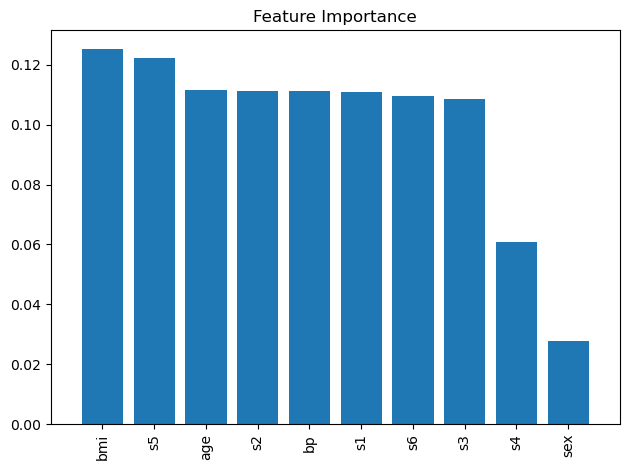

In [12]:
#call the title function from the matplotlib library, assign the title 'Feature Importance'
#call the bar function
##assign the x-axis with the length of the X_train dataset
##assign the y-axis with the values from the importances variable by indices
##assign the align parameter with the variable center
#call the xticks function
##assign with the length of the X_train dataset
##assign the label with the feat_label by indices, 
##assign the rotation variable with the value 90 to rotate by 90 degrees
#call the xlim function, assign with the range -1 to the length of the X_train dataset
#call the tight_layout function to compress the layout of the plot
#call the show function to display the graph
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

#### Print the Feature Importance from largest to smallest

In [16]:
#once we confirm our top 3
#use a for loop and run the loop for length of the first three features
#print the number of the indices, the name of the feature label, and the value of the importance
for f in range(len(indices)):
    print('{}) {:<20} {:6f}'.format(f+1,feat_labels[indices[f]],importances[indices[f]]))

1) bmi                  0.125302
2) s5                   0.122461
3) age                  0.111714
4) s2                   0.111433
5) bp                   0.111149
6) s1                   0.110946
7) s6                   0.109765
8) s3                   0.108642
9) s4                   0.060958
10) sex                  0.027629
